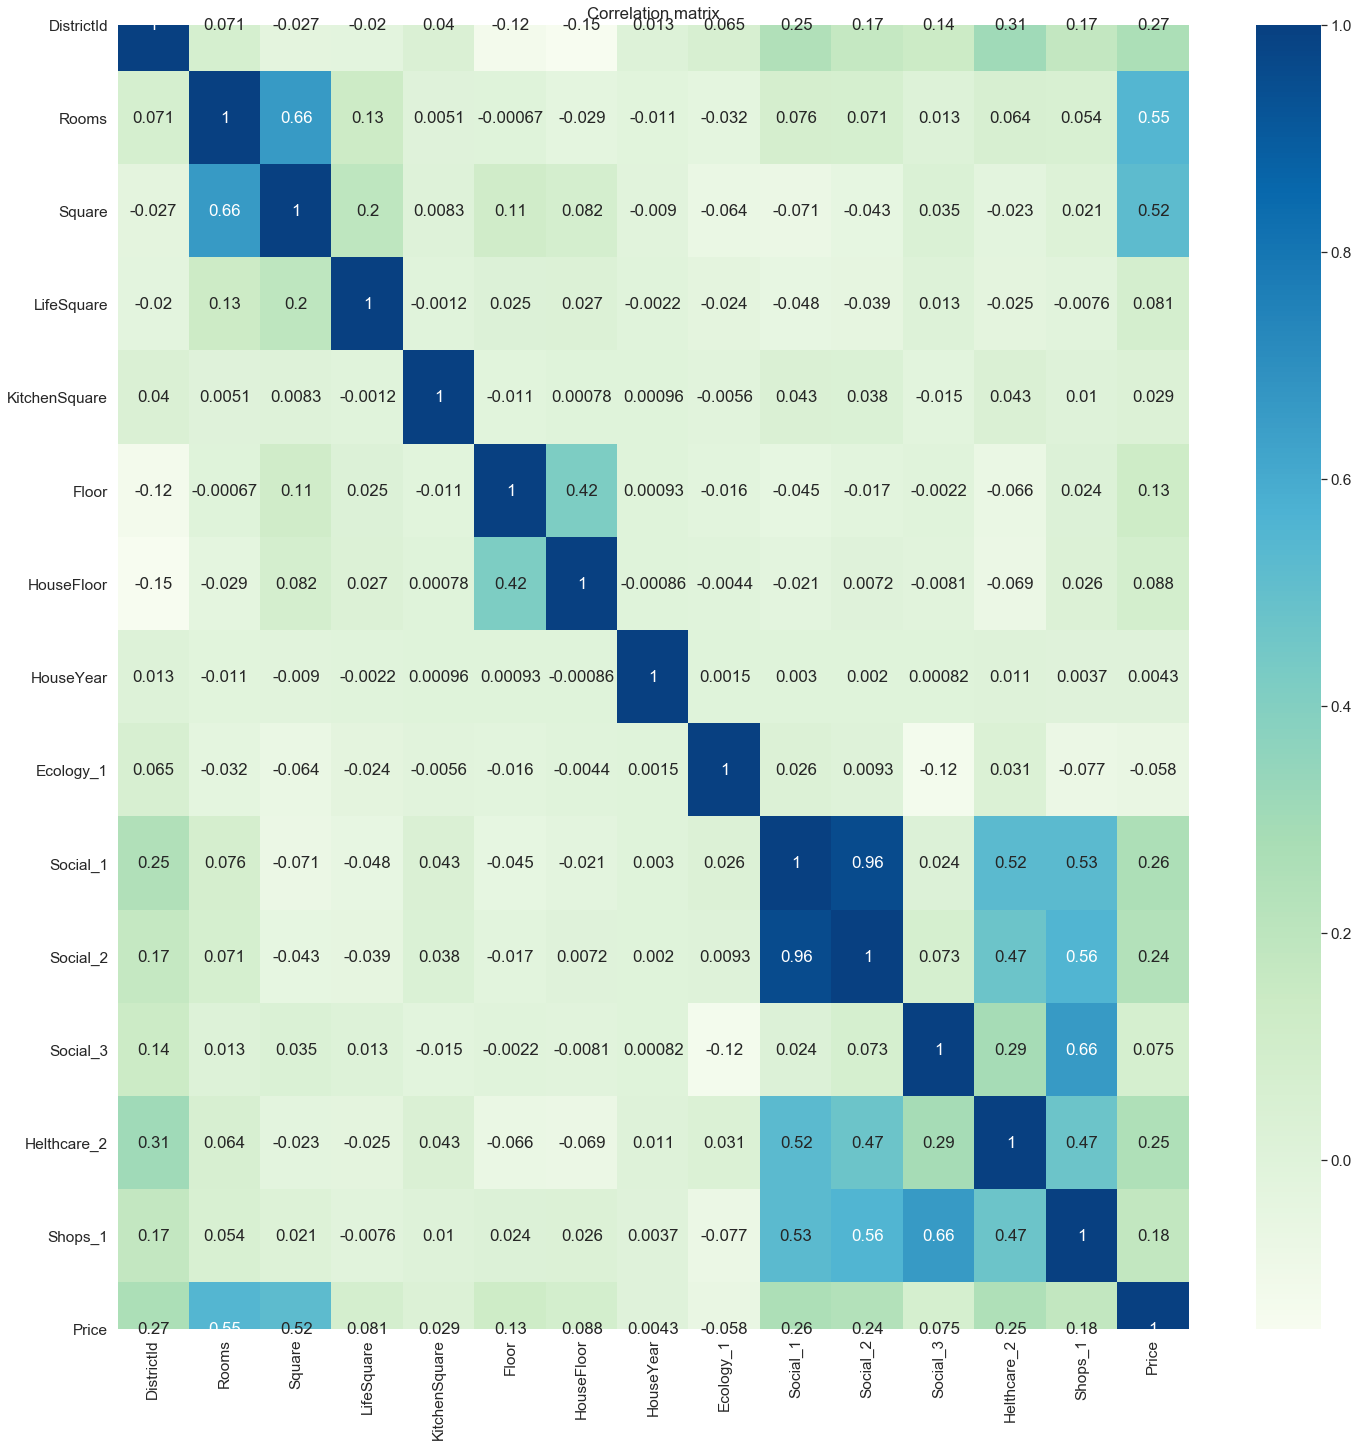

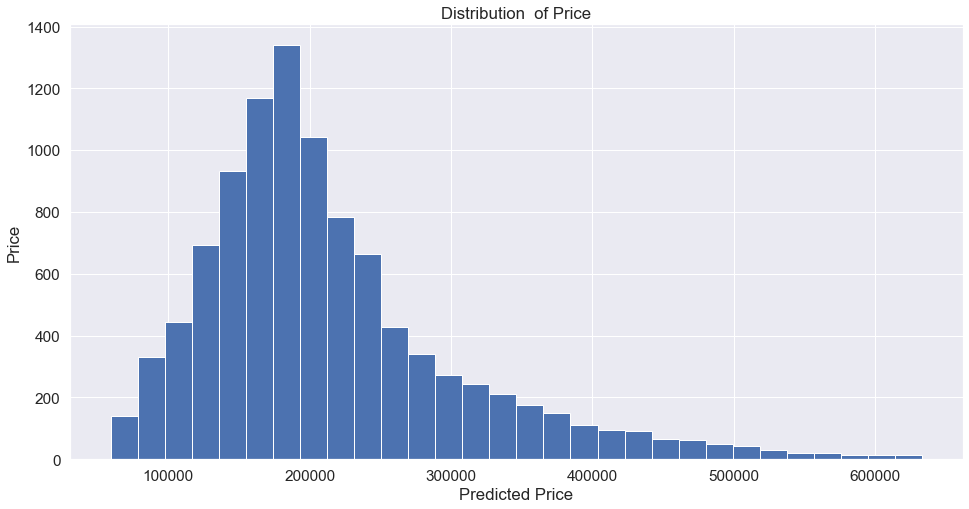

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

a = pd.read_csv('train.csv')
df0 = a.drop('Healthcare_1', axis=1)
df0 = df0.drop('Id', axis=1)
#df0['first_floor'] = df0['Floor'] == 1

plt.figure(figsize=(24,24))

sns.set(font_scale=1.4)
sns.heatmap(df0.corr(),cmap='GnBu',annot=True)

plt.title('Correlation matrix')
plt.show()

plt.figure(figsize=(16,8))
df0.Price.hist(bins=30)
plt.xlabel('Predicted Price')
plt.ylabel('Price')
plt.title('Distribution  of Price')
plt.show()

In [29]:
y = pd.DataFrame(df0['Price'], columns=['Price'])

df = df0.drop('Price', axis=1)
df = df.drop('LifeSquare', axis=1)

def evaluate_preds(true_values,pred_values):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_values,y=true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

def ob2int(ob):
    dictob = dict([(i, char) for i, char in enumerate(set(df[ob]))])
    for i in range(0, len(df)):
        if df.at[i, ob] == dictob[0]:
            df.at[i, ob] = 0
        else:
            df.at[i, ob] = 1
    df[ob] = df[ob].astype('int')
    return df[ob]

ob2int('Ecology_2')
ob2int('Ecology_3')
ob2int('Shops_2')
df.head()
#df.info()

scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

#df_sc.info()
df_sc.head()
#y.head()
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
#df_sc.describe()
#df.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

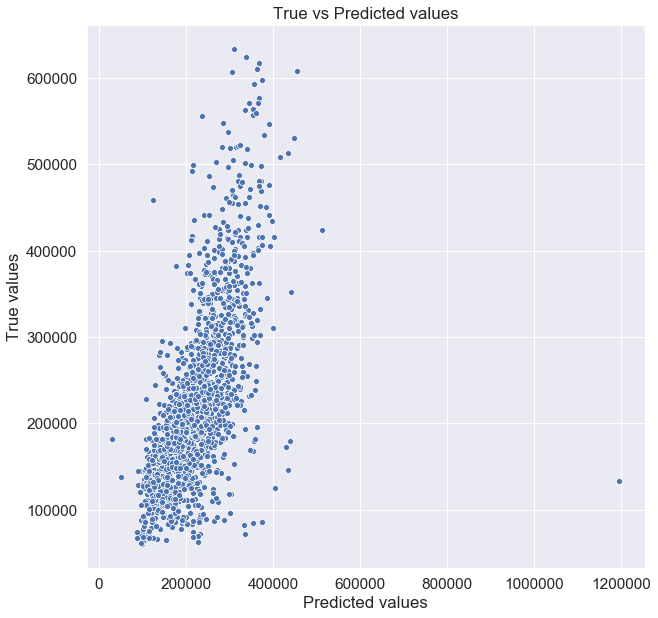

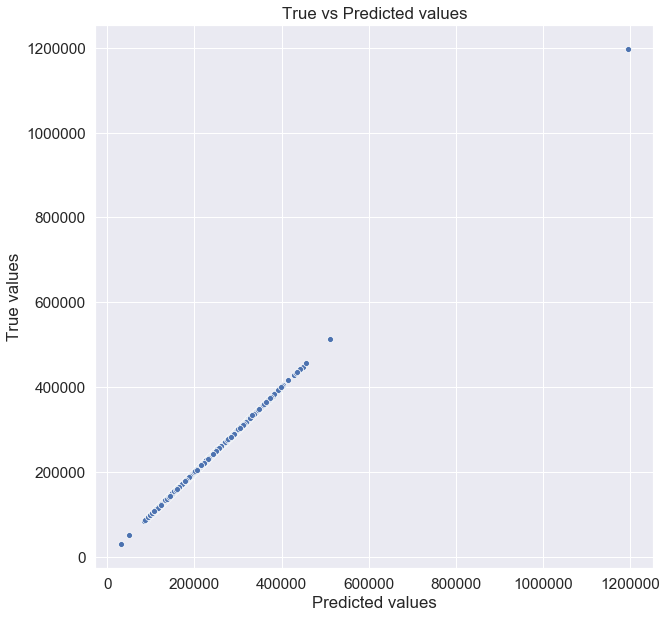

In [54]:
y_pr = lr.predict(x_test)
#print((y_test['Price']))
#print(np.shape(y_test['Price']))
#print(np.shape(y_pr[:, 0]))
r2_score(y_test, y_pr)
evaluate_preds(y_test['Price'], y_pr[:, 0])
evaluate_preds(y_pr[:, 0], y_pr[:, 0])